### 导入所需要的包

In [1]:
import os
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

### 配置环境与超参数

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
epochs = 5
batch_size = 128

### 数据读入与加载

In [3]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
test_img.shape

(10000, 28, 28)

In [6]:
train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

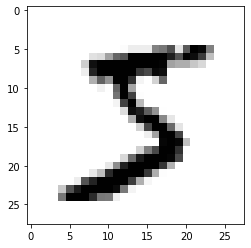

In [7]:
plt.imshow(train_img[0], cmap=plt.cm.binary)
plt.show()

#### 数据预处理

In [8]:
train_img = train_img.reshape((train_img.shape[0], 28*28))
train_img = train_img.astype("float32")/255

test_img = test_img.reshape((test_img.shape[0], 28*28))
test_img = test_img.astype("float32")/255

In [9]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [10]:
train_img.shape

(60000, 784)

### 模型设计

In [11]:
net_work = models.Sequential()
net_work.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
net_work.add(layers.Dense(10, activation="softmax"))

2022-07-28 22:41:44.365086: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-28 22:41:44.365656: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 22:41:44.370914: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### 编译模型

In [12]:
net_work.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

### 拟合模型

In [13]:
net_work.fit(train_img, train_label, epochs=epochs, batch_size=batch_size)

2022-07-28 22:41:45.328138: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-28 22:41:45.328662: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299760000 Hz


Epoch 1/5
469/469 [==============================] - 50s 104ms/step - loss: 0.4405 - accuracy: 0.8713
Epoch 2/5
469/469 [==============================] - 48s 103ms/step - loss: 0.1121 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0693 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 46s 97ms/step - loss: 0.0498 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 46s 99ms/step - loss: 0.0343 - accuracy: 0.9898


In [14]:
net_work.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 评估模型

In [15]:
test_loss, test_acc = net_work.evaluate(test_img, test_label, verbose=1)
print(f'Test Lose: {test_loss:.6f}, Test Accuracy: {test_acc:.6f}')

313/313 [==============================] - 19s 60ms/step - loss: 0.0722 - accuracy: 0.9792
Test Lose: 0.072233, Test Accuracy: 0.979200


### 推理

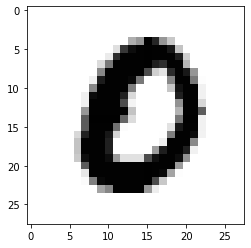

预测结果为：0


In [16]:
test_index = random.randint(0, test_img.shape[0])
plt.imshow(test_img[test_index].reshape(1, 28 , 28)[0], cmap=plt.cm.binary)
plt.show()
res = net_work.predict(test_img)
parser_val = res[test_index].argmax()
print('预测结果为：{}'.format(parser_val))